In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
%matplotlib inline

In [140]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FIRMPDEMP', 'MOTUSETECH', 'MOTUSETECH_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
r

<Response [200]>

In [141]:
df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
df["FIRMPDEMP"] = pd.to_numeric(df["FIRMPDEMP"])
df = df[df["MOTUSETECH_LABEL"].str.contains("Total")==False]

df = df.sort_values(by=['FIRMPDEMP'], ascending=False)
#df

In [142]:
temp = df.groupby(['MOTUSETECH_LABEL']).agg({'FIRMPDEMP':'sum'})
temp = pd.to_numeric(temp['FIRMPDEMP'])
temp = temp.sort_values(ascending=False)

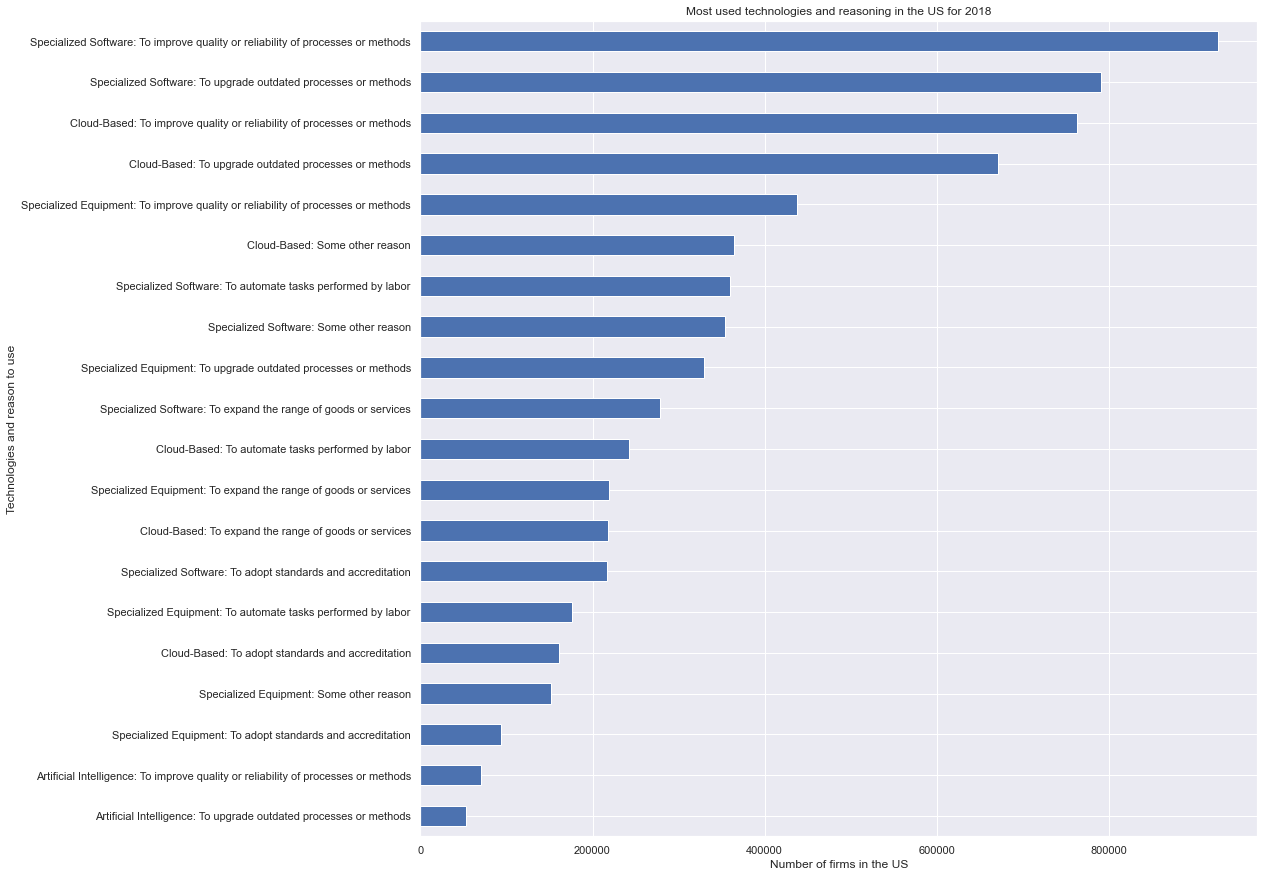

In [143]:
sns.set()
ax = temp[:20].plot(x='FIRMPDEMP', kind="barh")
sns.set(style="ticks")
plt.title('Most used technologies and reasoning in the US for 2018')
plt.xlabel('Number of firms in the US')
plt.ylabel('Technologies and reason to use')
plt.gca().invert_yaxis()
plt.show()

In [144]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FIRMPDEMP', 'MOTPRODTECH', 'MOTPRODTECH_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
r

<Response [200]>

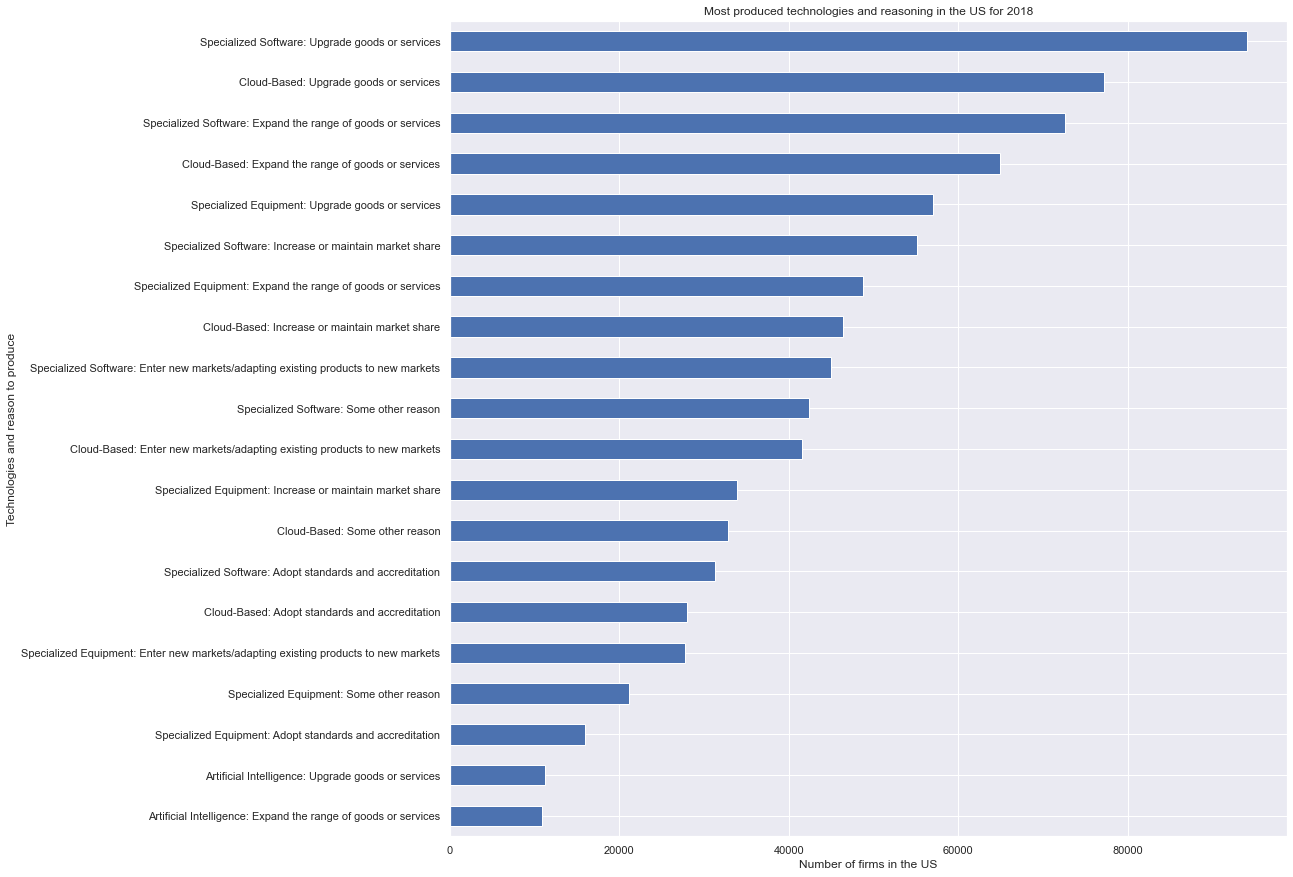

In [145]:
df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
df["FIRMPDEMP"] = pd.to_numeric(df["FIRMPDEMP"])
df = df[df["MOTPRODTECH_LABEL"].str.contains("Total")==False]
df = df.sort_values(by=['FIRMPDEMP'], ascending=False)

temp = df.groupby(['MOTPRODTECH_LABEL']).agg({'FIRMPDEMP':'sum'})
temp = pd.to_numeric(temp['FIRMPDEMP'])
temp = temp.sort_values(ascending=False)

sns.set()
ax = temp[:20].plot(x='FIRMPDEMP', kind="barh")
sns.set(style="ticks")
plt.title('Most produced technologies and reasoning in the US for 2018')
plt.xlabel('Number of firms in the US')
plt.ylabel('Technologies and reason to produce')
plt.gca().invert_yaxis()
plt.show()

In [174]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FIRMPDEMP', 'IMPACTWF_U', 'IMPACTWF_U_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
r

<Response [200]>

In [177]:
df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
df["FIRMPDEMP"] = pd.to_numeric(df["FIRMPDEMP"])
df = df[df["IMPACTWF_U_LABEL"].str.contains("Total")==False]
df = df.sort_values(by=['FIRMPDEMP'], ascending=False)

temp = df.groupby(['IMPACTWF_U_LABEL']).agg({'FIRMPDEMP':'sum'})
temp = pd.to_numeric(temp['FIRMPDEMP'])
temp = temp.sort_values(ascending=False)

#df

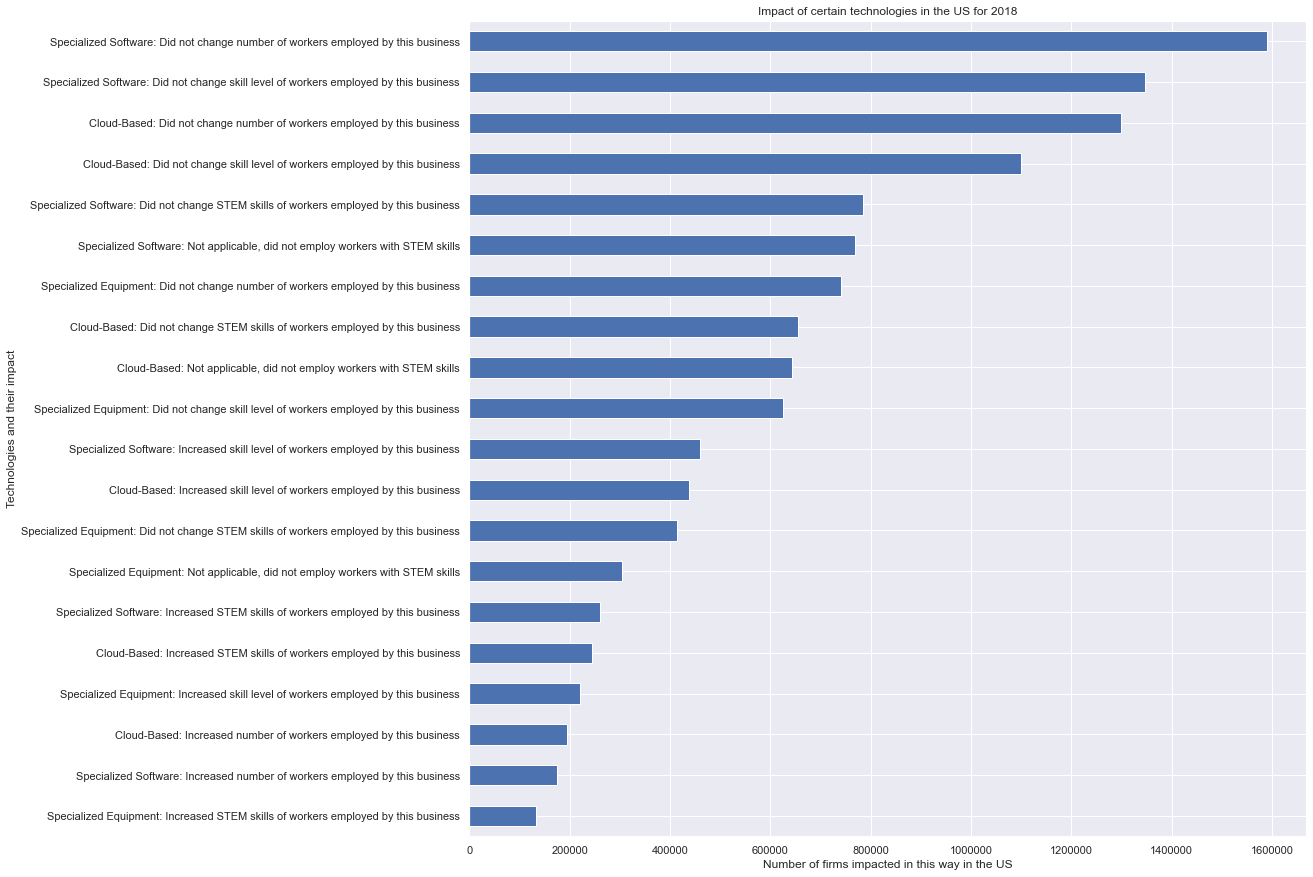

In [178]:
sns.set()
ax = temp[:20].plot(x='FIRMPDEMP', kind="barh")
ax.ticklabel_format(style='plain',  axis='x')
sns.set(style="ticks")
plt.title('Impact of certain technologies in the US for 2018')
plt.xlabel('Number of firms impacted in this way in the US')
plt.ylabel('Technologies and their impact')
plt.gca().invert_yaxis()
plt.show()

In [161]:
plt.rcParams['figure.figsize'] = [15, 15]


In [163]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'IMPACTWF_U', 'IMPACTWF_U_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
tech_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
tech_df

,NAME,IMPACTWF_U,IMPACTWF_U_LABEL,state
0,Alabama,T1E05D01,Artificial Intelligence: Increased number of w...,01
1,Alabama,T1E05D02,Artificial Intelligence: Decreased number of w...,01
2,Alabama,T1E05D03,Artificial Intelligence: Did not change number...,01
3,Alabama,T1E05D04,Artificial Intelligence: Increased skill level...,01
4,Alabama,T1E05D05,Artificial Intelligence: Decreased skill level...,01
...,...,...,...,...
2800,Wyoming,T5E17D07,Specialized Equipment: Increased STEM skills o...,56
2801,Wyoming,T5E17D08,Specialized Equipment: Decreased STEM skills o...,56
2802,Wyoming,T5E17D09,Specialized Equipment: Did not change STEM ski...,56
2803,Wyoming,T5E17D10,"Specialized Equipment: Not applicable, did not...",56


In [165]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscbo' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'OWNER_RACE', 'OWNER_RACE_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
owner_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
owner_df

,NAME,OWNER_RACE,OWNER_RACE_LABEL,state
0,Mississippi,00,All owners of respondent firms,28
1,Missouri,00,All owners of respondent firms,29
2,Montana,00,All owners of respondent firms,30
3,Nebraska,00,All owners of respondent firms,31
4,Nevada,00,All owners of respondent firms,32
5,New Hampshire,00,All owners of respondent firms,33
6,New Jersey,00,All owners of respondent firms,34
7,New Mexico,00,All owners of respondent firms,35
8,New York,00,All owners of respondent firms,36
9,North Carolina,00,All owners of respondent firms,37


In [166]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'BUSCHAR', 'BUSCHAR_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
buschar_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
buschar_df

,NAME,BUSCHAR,BUSCHAR_LABEL,state
0,Mississippi,A1,All firms,28
1,Mississippi,BQ,1 person,28
2,Mississippi,BQ01,2 to 4 people,28
3,Mississippi,BQ02,5 to 10 people,28
4,Mississippi,BQ03,11 or more people,28
...,...,...,...,...
403,Minnesota,BQ02,5 to 10 people,27
404,Minnesota,BQ03,11 or more people,27
405,Minnesota,BX,Unknown number of owners,27
406,Minnesota,BY,Total reporting,27


In [167]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscs' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'YIBSZFI', 'YIBSZFI_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
sum_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
sum_df

,NAME,YIBSZFI,YIBSZFI_LABEL,state
0,Mississippi,318,Firms with 2 to 3 years in business,28
1,Mississippi,319,Firms with 4 to 5 years in business,28
2,Mississippi,321,Firms with 6 to 10 years in business,28
3,Mississippi,322,Firms with 11 to 15 years in business,28
4,Mississippi,323,Firms with 16 or more years in business,28
...,...,...,...,...
352,Minnesota,318,Firms with 2 to 3 years in business,27
353,Minnesota,319,Firms with 4 to 5 years in business,27
354,Minnesota,321,Firms with 6 to 10 years in business,27
355,Minnesota,322,Firms with 11 to 15 years in business,27


In [173]:
merged = sum_df.merge(buschar_df.drop('state', axis = 1), how='inner', on='NAME')
merged = merged.merge(owner_df.drop('state', axis = 1), how='inner', on='NAME')
merged = merged.merge(tech_df.drop('state', axis = 1), how='inner', on='NAME')
merged

,NAME,YIBSZFI,YIBSZFI_LABEL,state,BUSCHAR,BUSCHAR_LABEL,OWNER_RACE,OWNER_RACE_LABEL,IMPACTWF_U,IMPACTWF_U_LABEL
0,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D01,Artificial Intelligence: Increased number of w...
1,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D02,Artificial Intelligence: Decreased number of w...
2,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D03,Artificial Intelligence: Did not change number...
3,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D04,Artificial Intelligence: Increased skill level...
4,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D05,Artificial Intelligence: Decreased skill level...
...,...,...,...,...,...,...,...,...,...,...
157075,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T3E11D10,"Specialized Software: Not applicable, did not ..."
157076,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T3E11D99,Specialized Software: Total Reporting
157077,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T4E14D01,Robotics: Increased number of workers employed...
157078,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T4E14D02,Robotics: Decreased number of workers employed...
